# UNIT 9. Convolutional Neural Networks on the MNIST dataset

This Unit includes an implementation of a CNN to calssify digits from the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Code adapted from 

```{bibliography}
:style: unsrt
```

we start by importing:
* the dataset *MNIST*
* the **[Sequential](https://keras.io/guides/sequential_model/)** function
* the differential layers:
  * **[Conv2D](https://towardsdatascience.com/conv2d-to-finally-understand-what-happens-in-the-forward-pass-1bbaafb0b148)**: creates the convolutional kernel to produce a set of output features
  * **[MaxPooling2D](https://deepai.org/machine-learning-glossary-and-terms/max-pooling)**: downsamples the input by taking the maximum value of the kernel, reducing the dimensionality of the model
  * **Flatten**: flattens the input tensor into a one dimensional vector. Useful when transitioning from a CNN to a fully connected CNN
  * **Dense**: standard fully connected NN layer. Each neuron in the layer is connected to all neurons in the previous layer. 
* **to_categorical**

In [158]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.utils import to_categorical



let us now load the MNIST dataset

In [159]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Let us display a collection of sample images

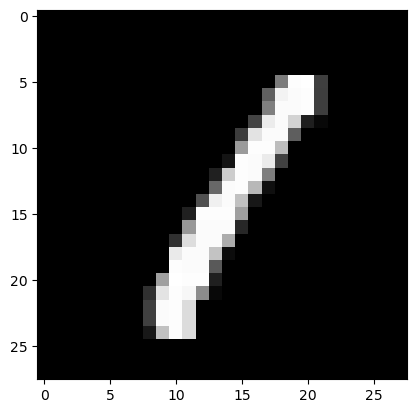

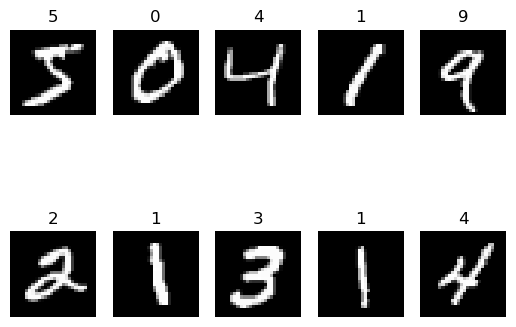

In [160]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3],cmap='gray')
plt.show()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

## Data preprocessing

### Feature Engineering

* Normalization


In [161]:
print('pre-normalization data:',X_train[0])
X_train = X_train.astype('float32')/255
X_text = X_test.astype('float32')/255
print('post-normalization data:',X_train[0])

pre-normalization data: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

* Reshape the dataset to be 4D
  * `batch_size`: the number of training examples processed
  * `height`/`width`: height/width of each input image in pixels
  * `channels`: number of color channels


In [162]:

X_train = np.expand_dims(X_train,axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

* [One hot encoding](https://blog.gopenai.com/one-hot-encoding-for-ml-with-tensorflow-and-keras-50f67ca9681a) using the `to_categorial` function. It converts the data into an integer. In this particular case, the best choice for this dataset would be to apply *sparse categorical crossentropy loss*— for the simple reason that we don’t have to apply one-hot encoding if we use that loss function. However, for the sake of training, we will apply here one hot encoding to use *categorical crossentropy loss*.

In [163]:
print(y_test.shape)
print(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_test.shape)
print(y_test)

(10000,)
[7 2 1 ... 4 5 6]
(10000, 10)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Build a CNN model

### Define the model architecture

* 4 layers (2 [convolutional](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and 2 Maxpooling)
* 1 flattening layer
* 1 fully connected layer

In [164]:
model = Sequential()
# first layer with 32 filters and a filter size of (3,3)
model.add(Conv2D(32,(3,3),activation='relu',input_shape=X_train.shape[1:]))
# we reduce the size to half with the MaxPooling layer
model.add(MaxPooling2D((2,2)))
# the third layer uses 64 filters
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
# convert the 2D map to a 1D vector
model.add(Flatten())
# fully connected layer with 10 output units, as the categories we have. Linear transformation followed by a softmax to finally select one category
model.add(Dense(10,activation='softmax'))

Compile the model. We will use the Adam optimizer (Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.)

In [165]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

let us have a look at the different kernels

In [166]:
print(model.layers[0].kernel)
print(model.layers[2].kernel)


<tf.Variable 'conv2d_10/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.09895009,  0.12586771,  0.0380891 ,  0.01202892,
           0.12914778, -0.10574912, -0.08778048, -0.12628773,
          -0.05951766,  0.08407287, -0.0634855 , -0.1352705 ,
          -0.01566178, -0.05151564, -0.13294259,  0.03796636,
          -0.12008007,  0.1365638 , -0.05711549,  0.05514371,
          -0.11983944, -0.0225997 ,  0.10617192, -0.02577193,
           0.10914858,  0.03174204,  0.04436368,  0.10029989,
          -0.00344543, -0.12739943, -0.01344968, -0.13784151]],

        [[ 0.1044555 ,  0.01781902,  0.02199383, -0.12023012,
          -0.04995723, -0.00367288, -0.06849337,  0.01848941,
           0.01262161, -0.1155962 ,  0.08964667,  0.05011003,
           0.10364786,  0.12845232, -0.00018822, -0.10542786,
          -0.03088594, -0.01458508,  0.05325902, -0.0919062 ,
           0.08324015, -0.05581184,  0.00665845,  0.06352873,
          -0.12388057,  0.05809985, -0.06612539, -0.1

## Train the model

* batch_size:
* epochs: number of iterations

In [167]:
model.fit(X_train,y_train,batch_size=128, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10


469/469 [==============================] - ETA: 0s - loss: 0.2819 - accuracy: 0.9196

## Model accuracy



In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test,verbose=2)
print('Test accuracy:',test_acc)
print('Test loss:',test_loss)

313/313 - 1s - loss: 8.3964 - accuracy: 0.9877 - 1s/epoch - 4ms/step
Test accuracy: 0.9876999855041504


In [ ]:
y_pred = model.predict(X_test)